In [2]:
# importing required libraries
import numpy as np
import pandas as pd
from pathlib import Path
# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline

#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.special import jv


## Reading the data

In [3]:
df = pd.read_csv('loan.csv')
df = df.rename(columns=lambda x: x.strip())
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

### Identifying shape of the data

In [4]:
df.shape

(39717, 111)

## Data Cleaning

Cleaning the dataset using following steps:
 - Drop columns with all null values
 - Drop columns with having only one, non null value
 - Drop columns that are not going to effect the driving factors
 - Validate internal rules
 
 #### Using loan_status as target column

### Checking Null count

In [5]:
df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

### Dropping tables with all null values


In [6]:
df.dropna(axis = 1, how = 'all', inplace = True)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

In [7]:
# Check shape again
df.shape

(39717, 57)

### Analyze unique values count in each column

In [8]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

*After analyzing data, plenty of columns are found which have only one non null value. Dropping all those columns*


In [9]:
df.drop(["initial_list_status",
         "collections_12_mths_ex_med",
         "policy_code",
         "pymnt_plan",
         "application_type",
         "acc_now_delinq",
         "chargeoff_within_12_mths",
         "out_prncp_inv",
         "delinq_amnt",
         "tax_liens"], axis = 1, inplace = True)
df.shape

(39717, 47)

### Checking for different loan status values


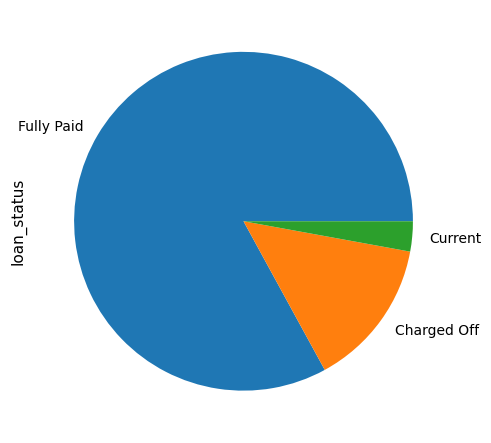

In [10]:
#Plot a pie chart
plt.style.use("seaborn-notebook")
# df['loan_status'].value_counts()
df['loan_status'].value_counts().plot.pie()
plt.show()

### Filtering out columns which are not relevant for our analysis

Since we only need data who don't have their loan status as current, as they are not labelled as defaulted, filtering data so that current ones are removed


In [11]:
df_var = df[df['loan_status'] != "Current"]
df_var['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Dropping columns that can not be considered as driving factors and would not be useful in our analysis

In [12]:
df_var.drop(["next_pymnt_d",
         "mths_since_last_record",
         "desc","emp_title",
         "last_pymnt_d",
         "id",
         "member_id",
         "url",
         "title",
         "last_credit_pull_d",
         "addr_state",
         "total_pymnt_inv",
         "funded_amnt",
         "revol_bal",
         "out_prncp",
         "total_pymnt",
         "total_rec_prncp",
         "total_rec_int",
         "total_rec_late_fee",
         "recoveries",
         "collection_recovery_fee",
         "last_pymnt_amnt"], axis = 1, inplace = True)

In [13]:
## Checking the shape of the file
df_var.shape

(38577, 25)

In [14]:
# Checking for null count
df_var.isnull().sum().sort_values(ascending=False)

mths_since_last_delinq    24905
emp_length                 1033
pub_rec_bankruptcies        697
revol_util                   50
purpose                       0
total_acc                     0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
earliest_cr_line              0
delinq_2yrs                   0
dti                           0
zip_code                      0
loan_amnt                     0
funded_amnt_inv               0
issue_d                       0
verification_status           0
annual_inc                    0
home_ownership                0
sub_grade                     0
grade                         0
installment                   0
int_rate                      0
term                          0
loan_status                   0
dtype: int64

### Stardardize the data

 - Fix missing values
 - Stadardize units
 - Remove Extra characters
 - Stardardize precision
 - Standardize format (date format - YYYY-MM-DD)
 - Remove Outliners


In [15]:
# Calculate percentage of mths_since_last_delinq for non null
ndf = df_var[~df_var['mths_since_last_delinq'].isnull()]
percentage = ((df_var['mths_since_last_delinq'].isnull()).sum())/(df_var['mths_since_last_delinq'].shape[0])
print('Null Values percentage for mths_since_last_delinq ->', percentage*100)


Null Values percentage for mths_since_last_delinq -> 64.55919330170828


In [16]:
# Dropping mths_since_last_delinq as it has more than 50% of null values
df_var.drop(["mths_since_last_delinq"], axis = 1, inplace = True)

In [17]:
# Calculate percentage of delinq_2yrs for non zero
ndf = df_var[df_var['delinq_2yrs']>0]
percentage = (ndf.shape[0])/(df_var['delinq_2yrs'].shape[0])
print('Non Zero Values delinq_2yrs ->', percentage*100)


Non Zero Values delinq_2yrs -> 10.86398631308811


In [18]:
# Dropping delinq_2yrs as it has more than 90% of zero values
df_var.drop(["delinq_2yrs"], axis = 1, inplace = True)

In [19]:
# Looking for columns with null value count
df_var.isnull().sum().sort_values(ascending=False)

emp_length              1033
pub_rec_bankruptcies     697
revol_util                50
loan_status                0
total_acc                  0
pub_rec                    0
open_acc                   0
inq_last_6mths             0
earliest_cr_line           0
dti                        0
zip_code                   0
purpose                    0
loan_amnt                  0
funded_amnt_inv            0
verification_status        0
annual_inc                 0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
issue_d                    0
dtype: int64

In [20]:
# Fill emp_length with most occured category
mode = df_var['emp_length'].mode()
df_var['emp_length'].fillna(df['emp_length'].mode()[0], inplace = True)


In [21]:
pub_rec_bankruptcies_non_zero =  df_var[df_var['pub_rec_bankruptcies']>0]
print('percentage of non zero values', (pub_rec_bankruptcies_non_zero.shape[0]/df_var.shape[0])*100)

percentage of non zero values 4.256422220494076


In [22]:
# Since more than 95% of pub_rec_bankruptcies is 0 or null, hence dropping the columns
df_var.drop(["pub_rec_bankruptcies"], axis = 1, inplace = True)

In [23]:
# Define common functions here

def format_data(data):
    if int(data.split('-')[1]) < 40:
        return str('20'+data.split('-')[1]+'-'+data.split('-')[0]+'-'+'1')
    else:
        return str('19'+data.split('-')[1]+'-'+data.split('-')[0]+'-'+'1')

In [24]:
# removing null values, as adding something here might impact analysis
df_var = df_var[~df_var['revol_util'].isnull()]
df_var['revol_util'] = pd.to_numeric(df_var['revol_util'].apply(lambda item : item.replace('%', '')), errors='coerce')


In [25]:
# removing XX from zip_code
df_var['zip_code'] = df_var['zip_code'].apply(lambda item : item.replace('xx', ''))

In [26]:
# Verifying if all null values are removed
df_var['int_rate'] = df['int_rate'].apply(lambda item: item.replace('%', ''))

In [27]:
# Add prefix value as first day of the month and adding prefix 19,20 in the year 
df_var['issue_d'] = df_var['issue_d'].apply(lambda item: format_data(item)) 
df_var['earliest_cr_line'] = df_var['earliest_cr_line'].apply(lambda item: format_data(item)) 

In [28]:
# Convert to Datetime columm
df_var['issue_d']=pd.to_datetime(df_var['issue_d'].astype(str), format='%Y-%b-%d', errors='coerce')
df_var['earliest_cr_line'] = pd.to_datetime(df_var['earliest_cr_line'].astype(str), format='%Y-%b-%d', errors='coerce') 

In [29]:
# Round off funded_amnt_inv to 2 decimel places
df_var['funded_amnt_inv'] = df_var['funded_amnt_inv'].round(2)

In [30]:
# Converting terms to years and converting it to number of years
df_var['term'].value_counts()
df_var['term'] = df_var['term'].apply(lambda item: int(item.replace('months','').strip()))
df_var['term'] = df_var['term']/12 


In [31]:
# Convert type to int64 from float64 and object as float64
df_var['annual_inc'] = df_var['annual_inc'].astype('int64')
df_var['term'] = df_var['term'].astype('int64')
df_var['int_rate'] = df_var['int_rate'].astype('float64')
df_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38527 non-null  int64         
 1   funded_amnt_inv      38527 non-null  float64       
 2   term                 38527 non-null  int64         
 3   int_rate             38527 non-null  float64       
 4   installment          38527 non-null  float64       
 5   grade                38527 non-null  object        
 6   sub_grade            38527 non-null  object        
 7   emp_length           38527 non-null  object        
 8   home_ownership       38527 non-null  object        
 9   annual_inc           38527 non-null  int64         
 10  verification_status  38527 non-null  object        
 11  issue_d              38527 non-null  datetime64[ns]
 12  loan_status          38527 non-null  object        
 13  purpose              38527 non-

In [32]:
# Filter columns having issue_d lesser than reported credited date (Validating Business Rules) 
df_var = df_var[df_var['issue_d'] > df_var['earliest_cr_line']]

In [33]:
# df_var.rename(columns={"loan_amt": "loan_amt", "funded_amnt_inv": "amt_comm_inv", "C": "c"}, errors="raise")

Lets start removing outliers with the very high and low values, lets start with annual income as this can have people with very 
high income

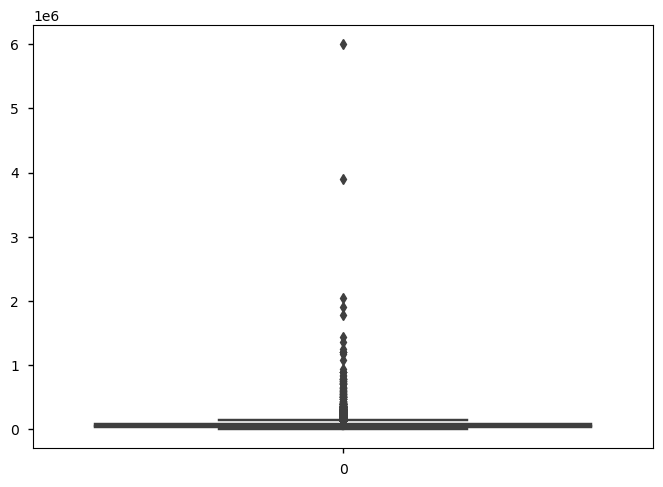

In [34]:
sns.boxplot(df_var['annual_inc'])
plt.show()


As the max amount seems to be too high, we took a quantile of 95 which seems a bit better

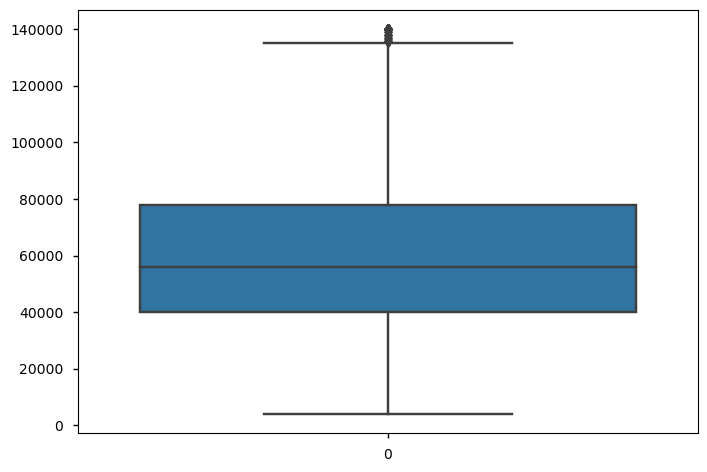

In [35]:
quantile = df_var['annual_inc'].quantile(0.95)
df_var = df_var[df_var['annual_inc'] <= quantile]
sns.boxplot(df_var['annual_inc'])
plt.show()

Now checking for the loan amount column

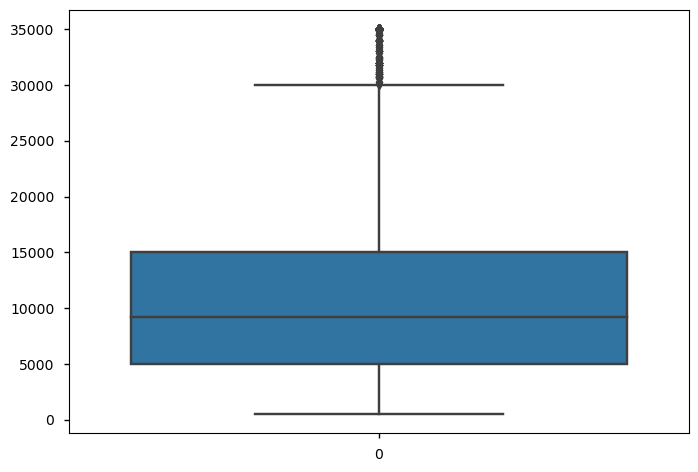

In [36]:
sns.boxplot(df_var['loan_amnt'])
plt.show()


In [37]:
# As this looks like a true outliers and the value is not varying to that much, keeping it as is
df_var['loan_amnt'].quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])


0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

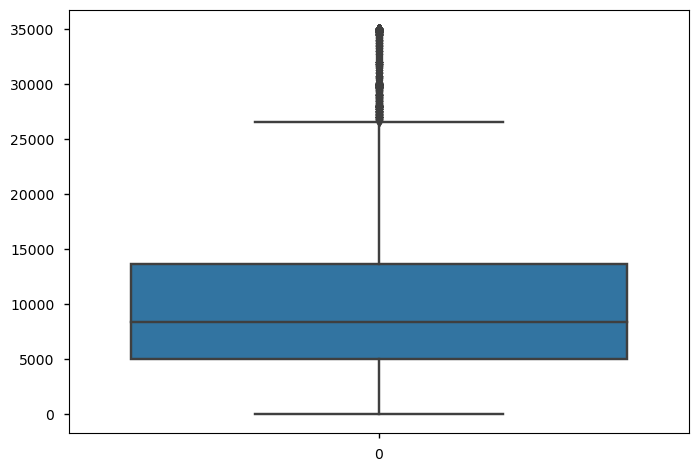

In [38]:
sns.boxplot(df_var['funded_amnt_inv'])
plt.show()


In [39]:
# There are a few outliers but these may not affect our calculations too much, keeping them as is
df_var['funded_amnt_inv'].quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    13650.0000
0.900    19750.0000
0.950    23949.2875
0.970    24975.0000
0.975    25350.0000
0.980    27953.2850
0.990    31966.7995
1.000    35000.0000
Name: funded_amnt_inv, dtype: float64

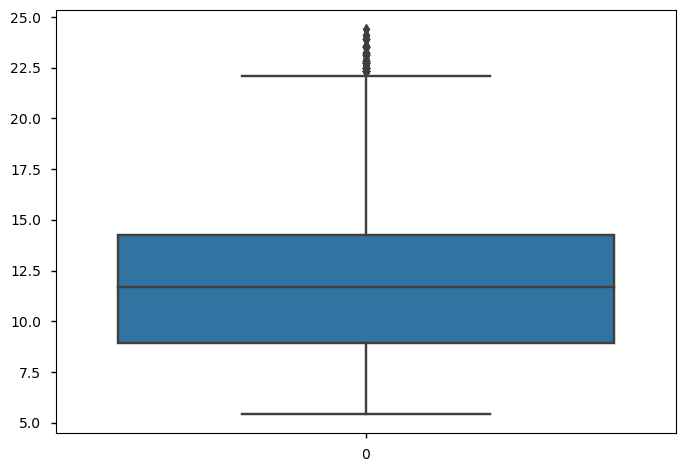

In [40]:
sns.boxplot(df_var['int_rate'])
plt.show()


In [41]:
df_var['int_rate'].quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    14.27
0.900    16.77
0.950    18.25
0.970    19.29
0.975    19.42
0.980    19.91
0.990    20.89
1.000    24.40
Name: int_rate, dtype: float64

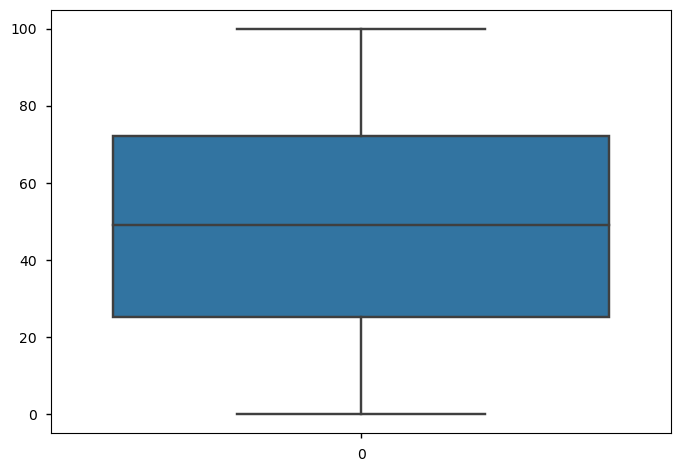

In [42]:
sns.boxplot(df_var['revol_util'])
plt.show()


### Derived Columns

Creating issue_year and issue_month columns which have been derived from issue_d column to separate out month and year

In [43]:
df_var['issue_year'], df_var['issue_month'] = df_var['issue_d'].dt.year, df_var['issue_d'].dt.month

#### Analyze data

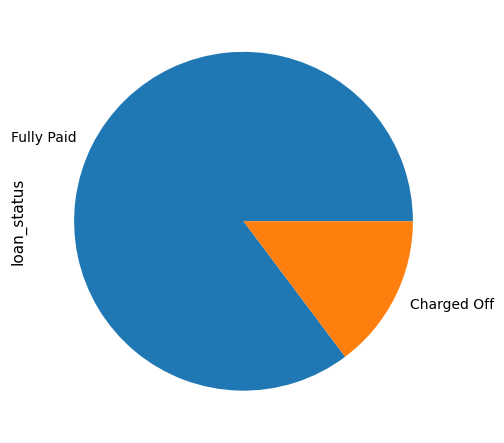

In [44]:
df_var['loan_status'].value_counts().plot.pie()
plt.show()

In [45]:
# Lets check if any of the fully paid loan status is still defaulted
fully_paid = df_var[df_var['loan_status']== 'Fully Paid']

fully_paid.shape

(31204, 24)

### Plotting Pair plot to analyse data  

In [46]:
fully_paid['earliest_cr_line'].sort_values(ascending=False)

521     2008-11-01
2960    2008-10-01
2115    2008-09-01
1450    2008-09-01
6326    2008-09-01
           ...    
13975   1956-09-01
22031   1954-11-01
6118    1954-10-01
15269   1950-12-01
14077   1946-01-01
Name: earliest_cr_line, Length: 31204, dtype: datetime64[ns]

>Since the last date for fully paid customer is Nov 2008 and defaulted can be max for 7 years, so this can be considered that all the fully paid customers are not defaulted, now lets analyze the charged off loan status who are being termed as defaulted

In [47]:
charged_off = df_var[df_var['loan_status']== 'Charged Off']


## Using various plots using group to analyze the columns to derive conclusions

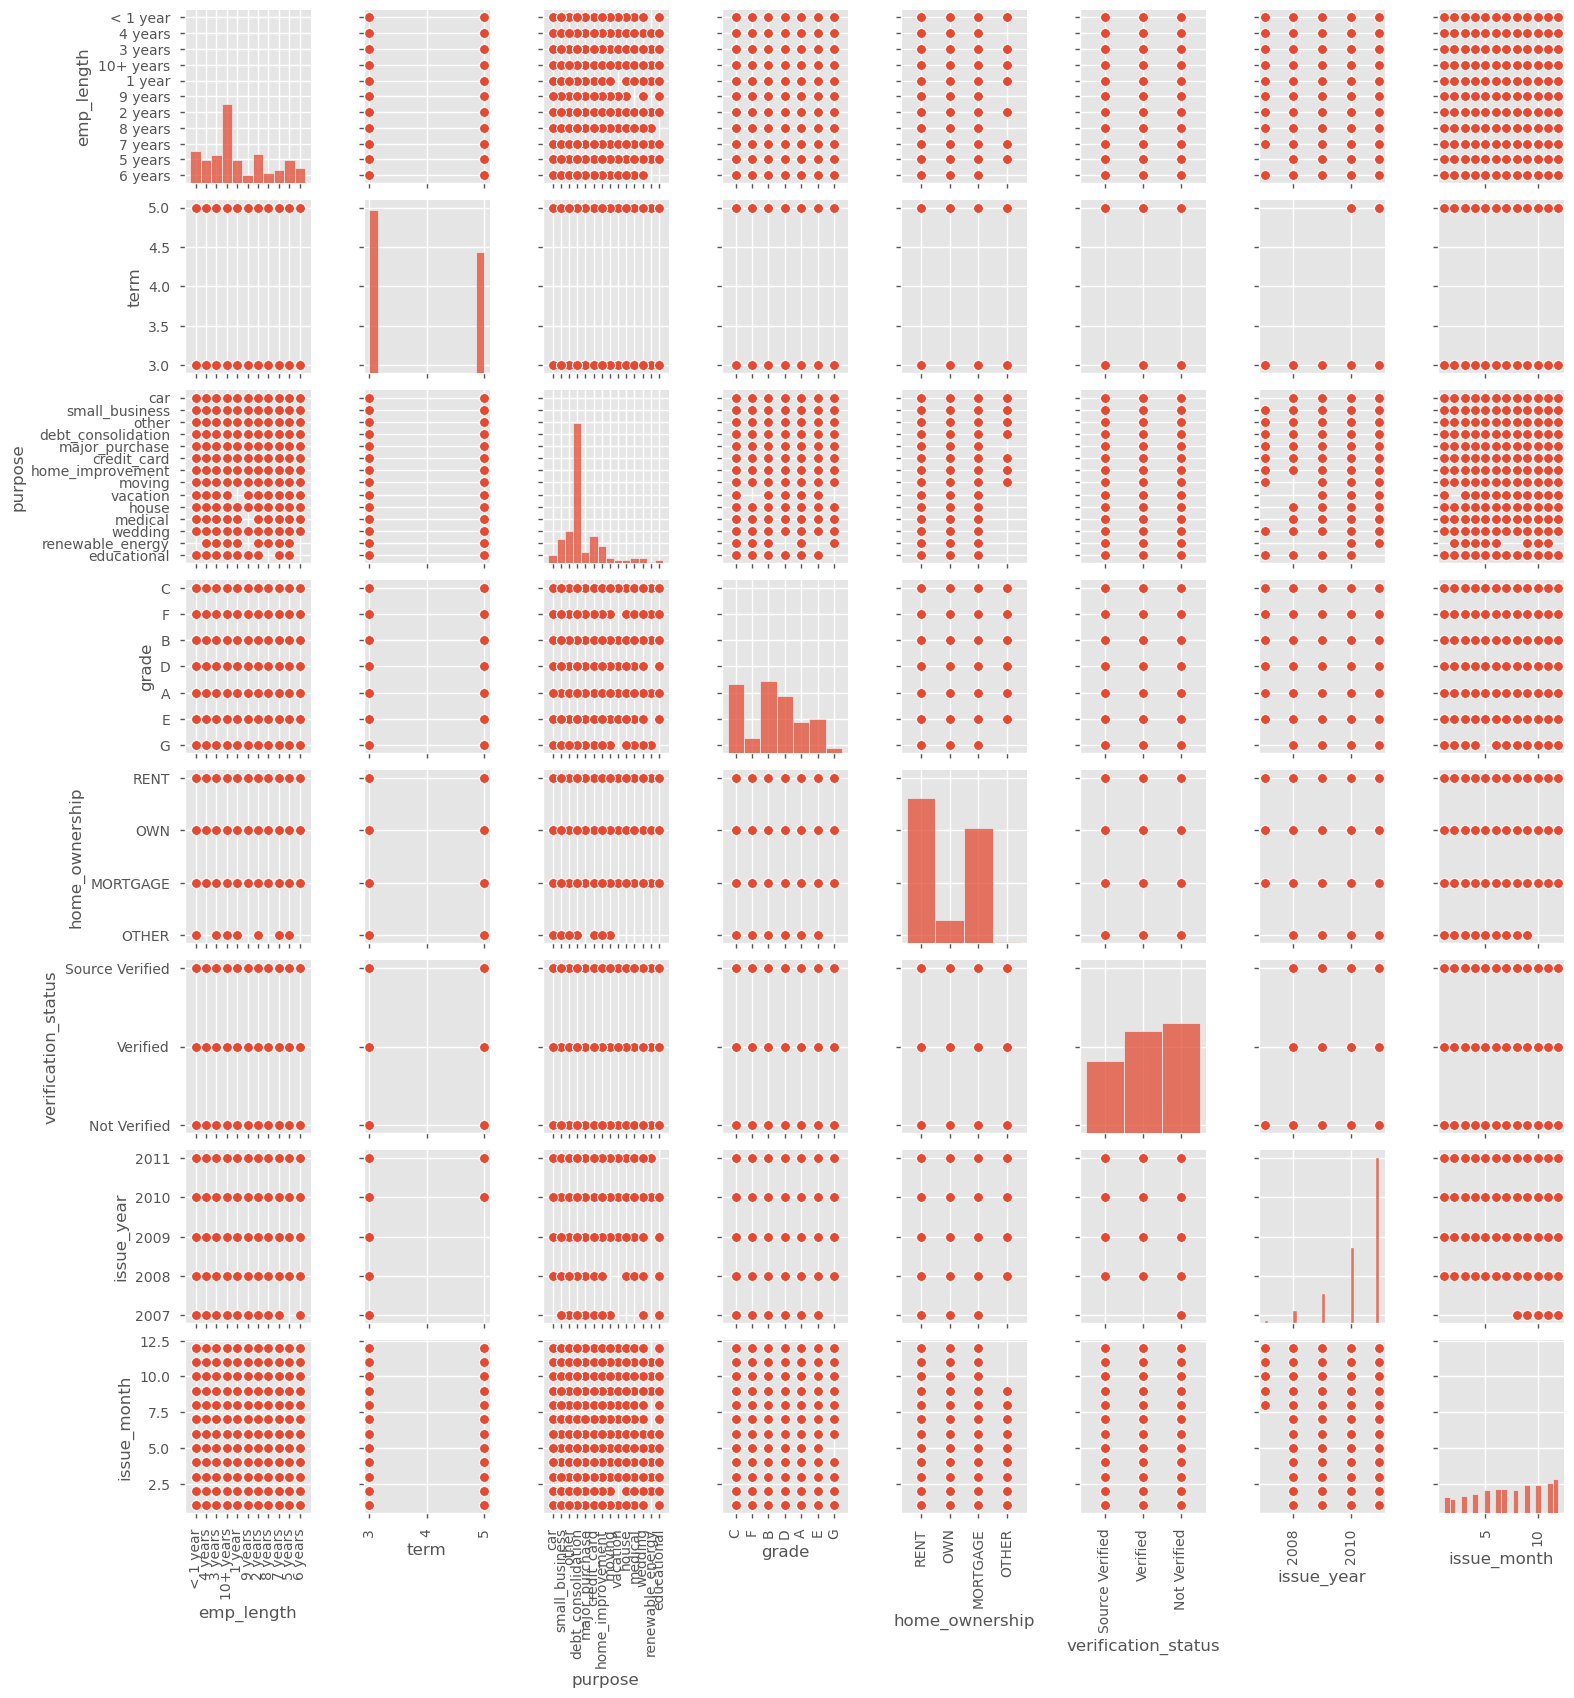

In [48]:
plt.style.use("ggplot")

g= sns.pairplot(charged_off, hue_order="smoker",markers=["o", "s"], vars=['emp_length', 'term','purpose', 'grade','home_ownership', 'verification_status', 'issue_year', 'issue_month'], height=2)
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)
plt.show()

### Though most of the data look similar below are some observations for bivariant Analysis
- With every issue_year funded_amnt_inv, int_rate and installment increases
- Term 3 years
- The loan amount was common in most of the year, it increases by approximately 5k in 2011
- Annual income for year 2007 and 2008 looks similar, but a bit of hike in 2009 and them similar till 2011


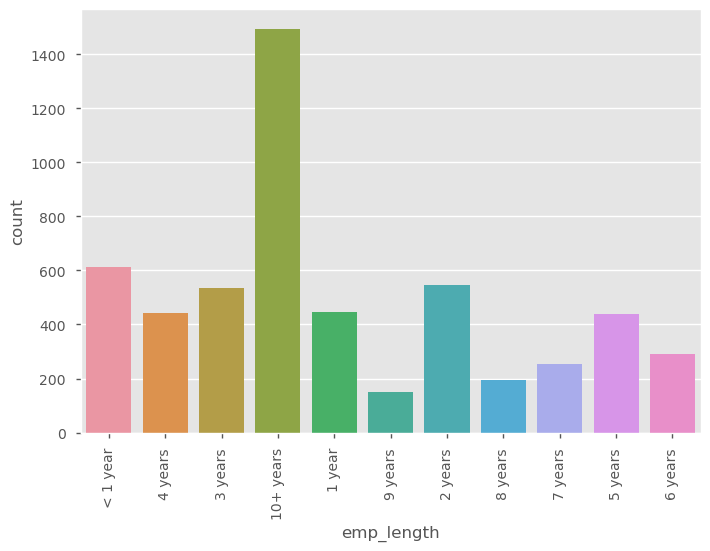

In [50]:
sns.countplot(x='emp_length', data=charged_off)
plt.xticks(rotation=90)
plt.show()

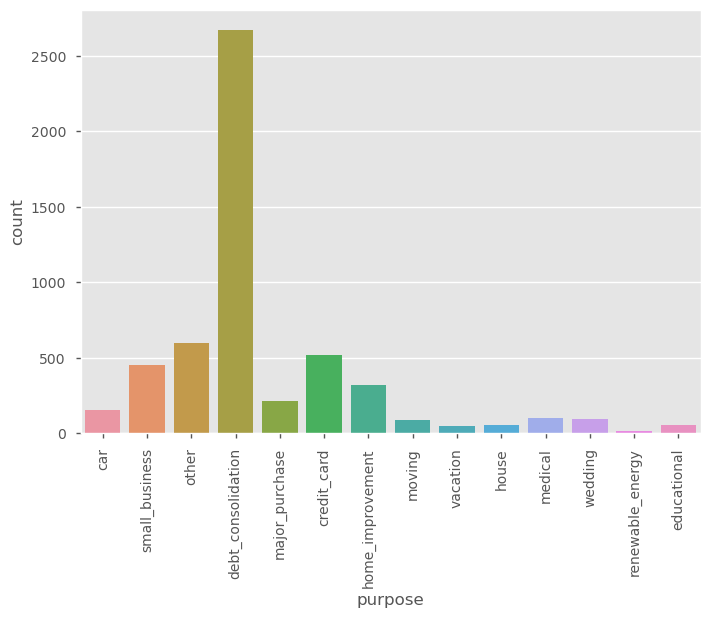

In [51]:
sns.countplot(x='purpose', data=charged_off)
plt.xticks(rotation=90)
plt.show()

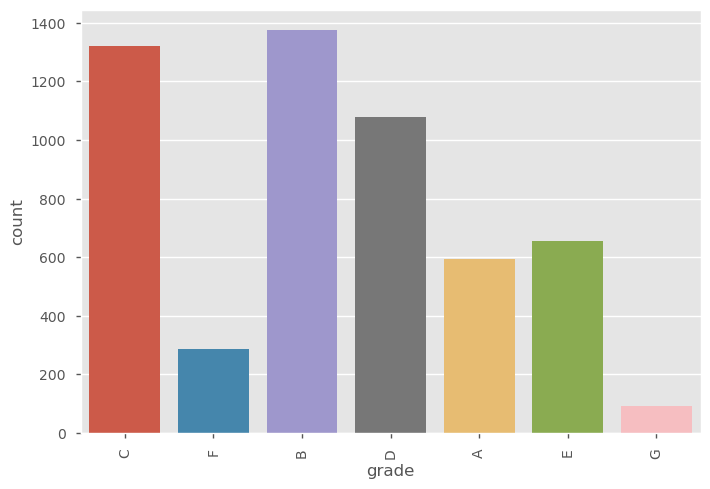

In [52]:
sns.countplot(x='grade', data=charged_off)
plt.xticks(rotation=90)
plt.show()

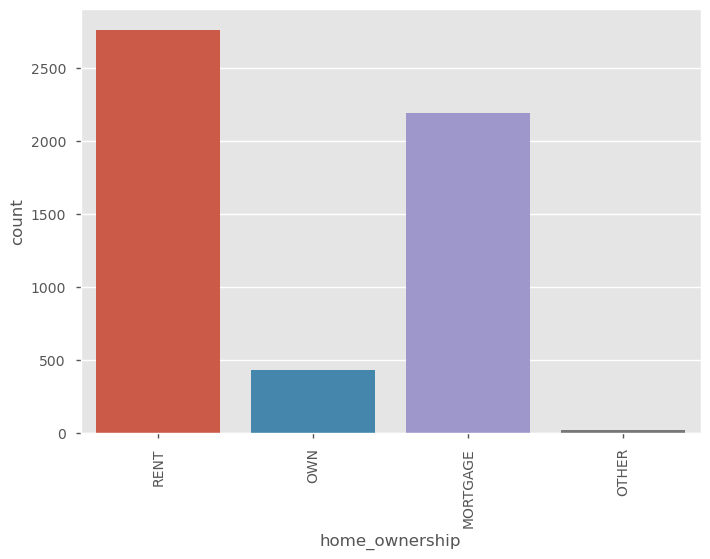

In [53]:
sns.countplot(x='home_ownership', data=charged_off)
plt.xticks(rotation=90)
plt.show()

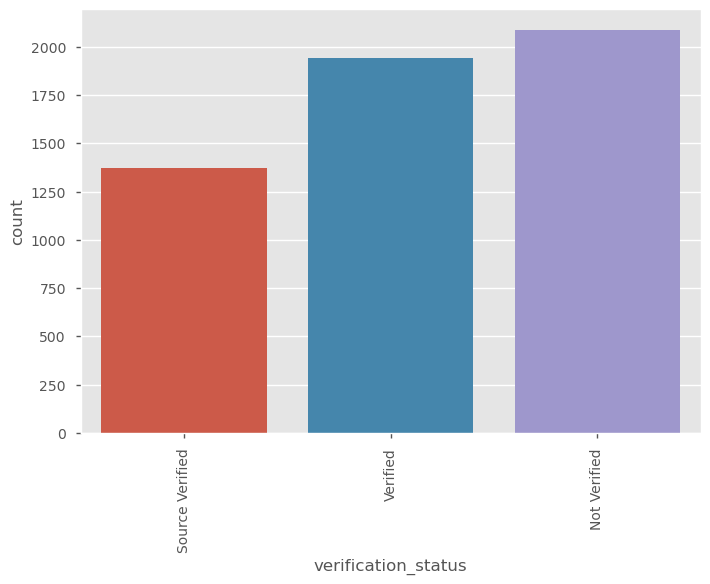

In [54]:
sns.countplot(x='verification_status', data=charged_off)
plt.xticks(rotation=90)
plt.show()

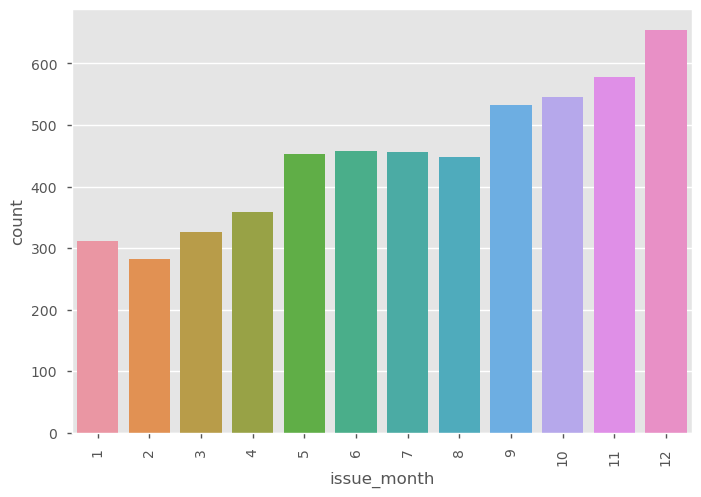

In [55]:
sns.countplot(x='issue_month', data=charged_off)
plt.xticks(rotation=90)
plt.show()

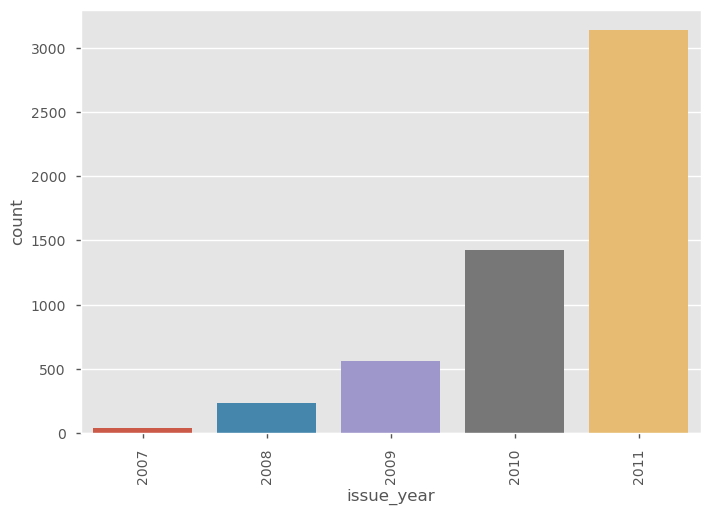

In [56]:
sns.countplot(x='issue_year', data=charged_off)
plt.xticks(rotation=90)
plt.show()

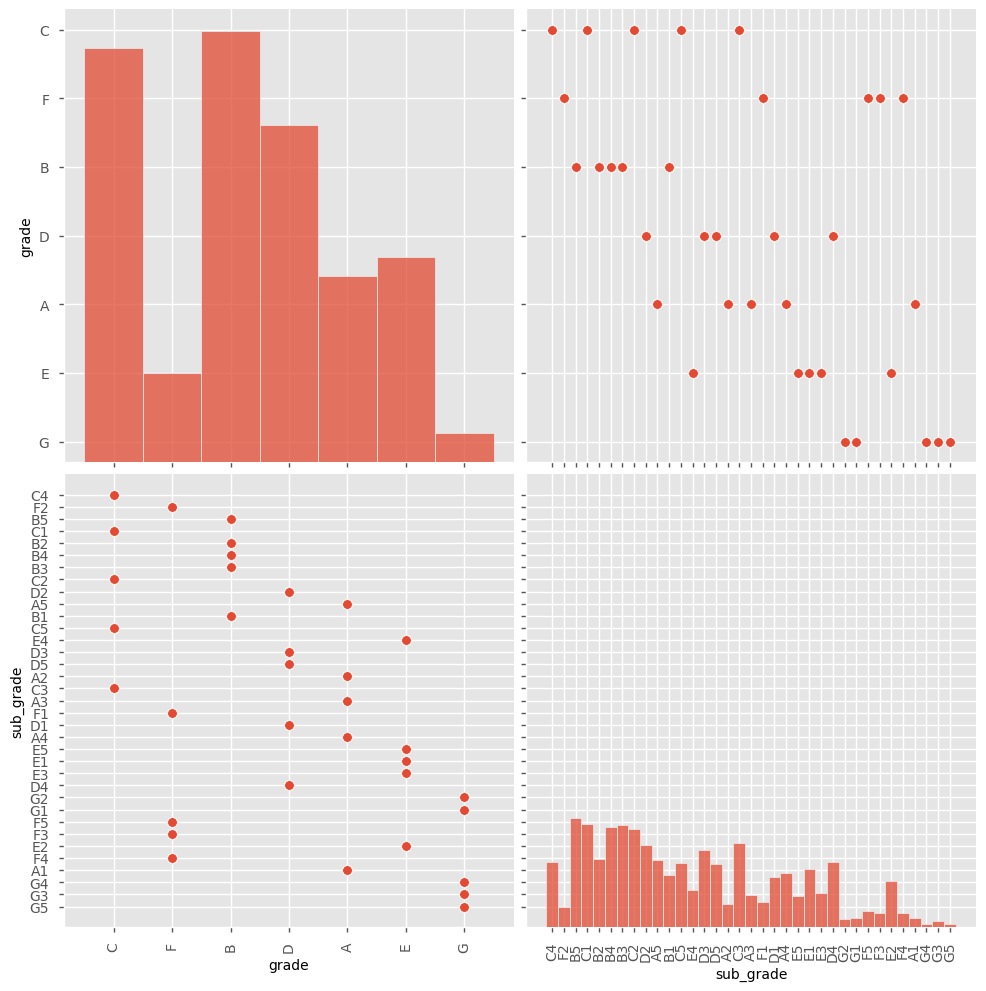

In [50]:
g= sns.pairplot(charged_off, hue_order="smoker",markers=["o", "s"], vars=['grade', 'sub_grade'], height=5)
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)
plt.show()

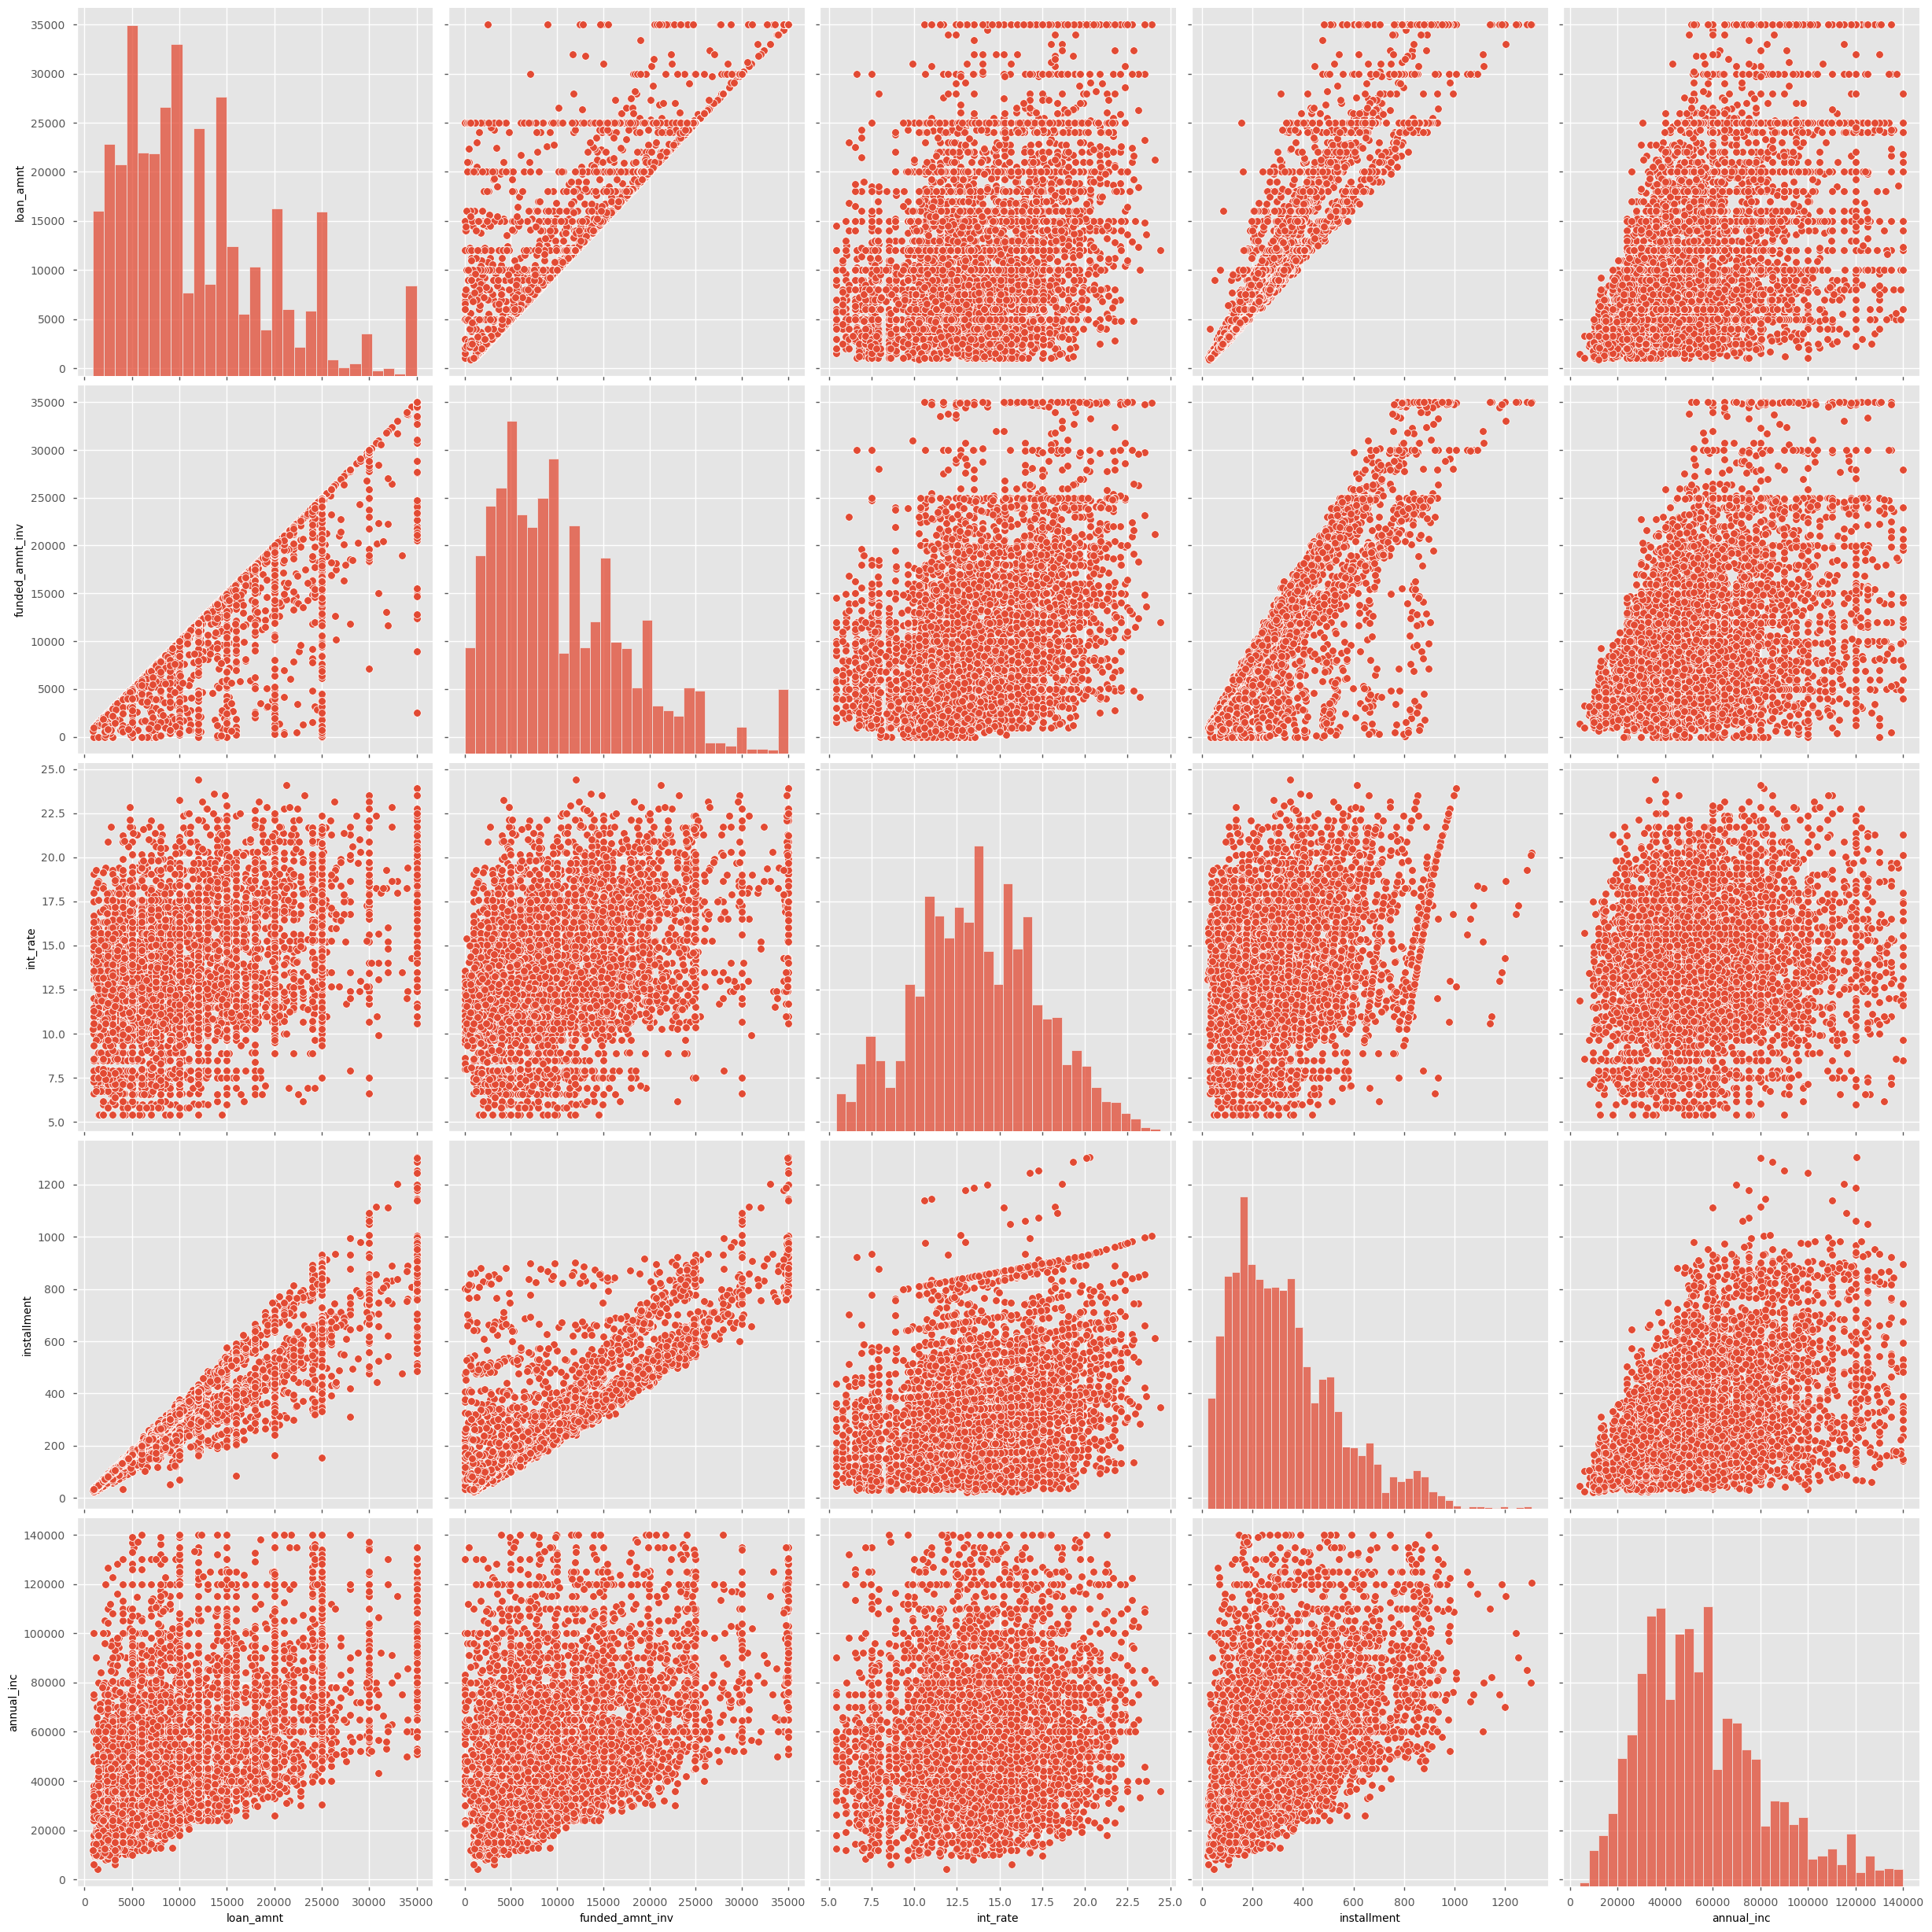

In [52]:
# See if we can group categories for any data values
sns.pairplot(charged_off[['loan_status', 'loan_amnt', 'funded_amnt_inv','int_rate', 'installment', 'annual_inc']], hue_order="smoker",markers=["o", "s"],diag_kind="hist", kind="scatter", height=5)
plt.show()


Analysis of above data to be defaulted

- People with 6k-8k of loan amount
- People with 6k-8k of the amount comiited by investors for that loan (funded_amnt_inv)
- People with rate of interest between 11 to 13
- People with installed 945 or near by
- People with dti in between 12 to 17
- People with open_acc between 6 to 9
- People with revol_util 65 to 85
- Peoplle with year of issue 2011 or month of issue December
------------------------------------------------------------------------------




- With an increase in funded_amnt_inv the loan amount decreases
- With an increason in funded_amnt_inv number of installments also increases
- The number of installments increases with the increase in loan amount


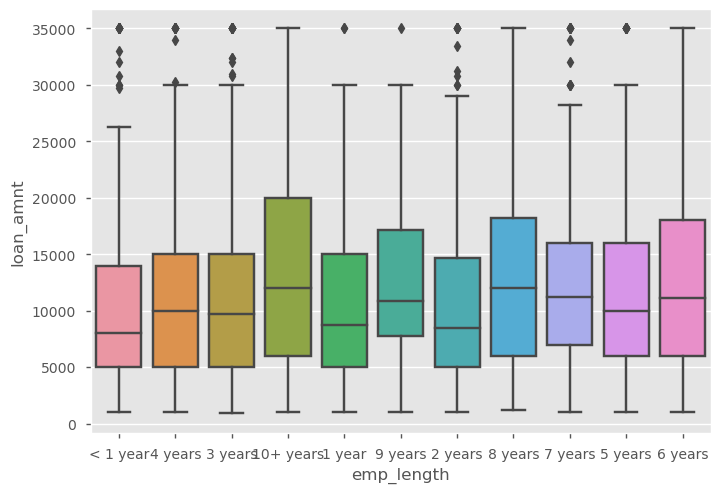

In [58]:
sns.boxplot(data=charged_off, x="emp_length", y="loan_amnt")
plt.show()

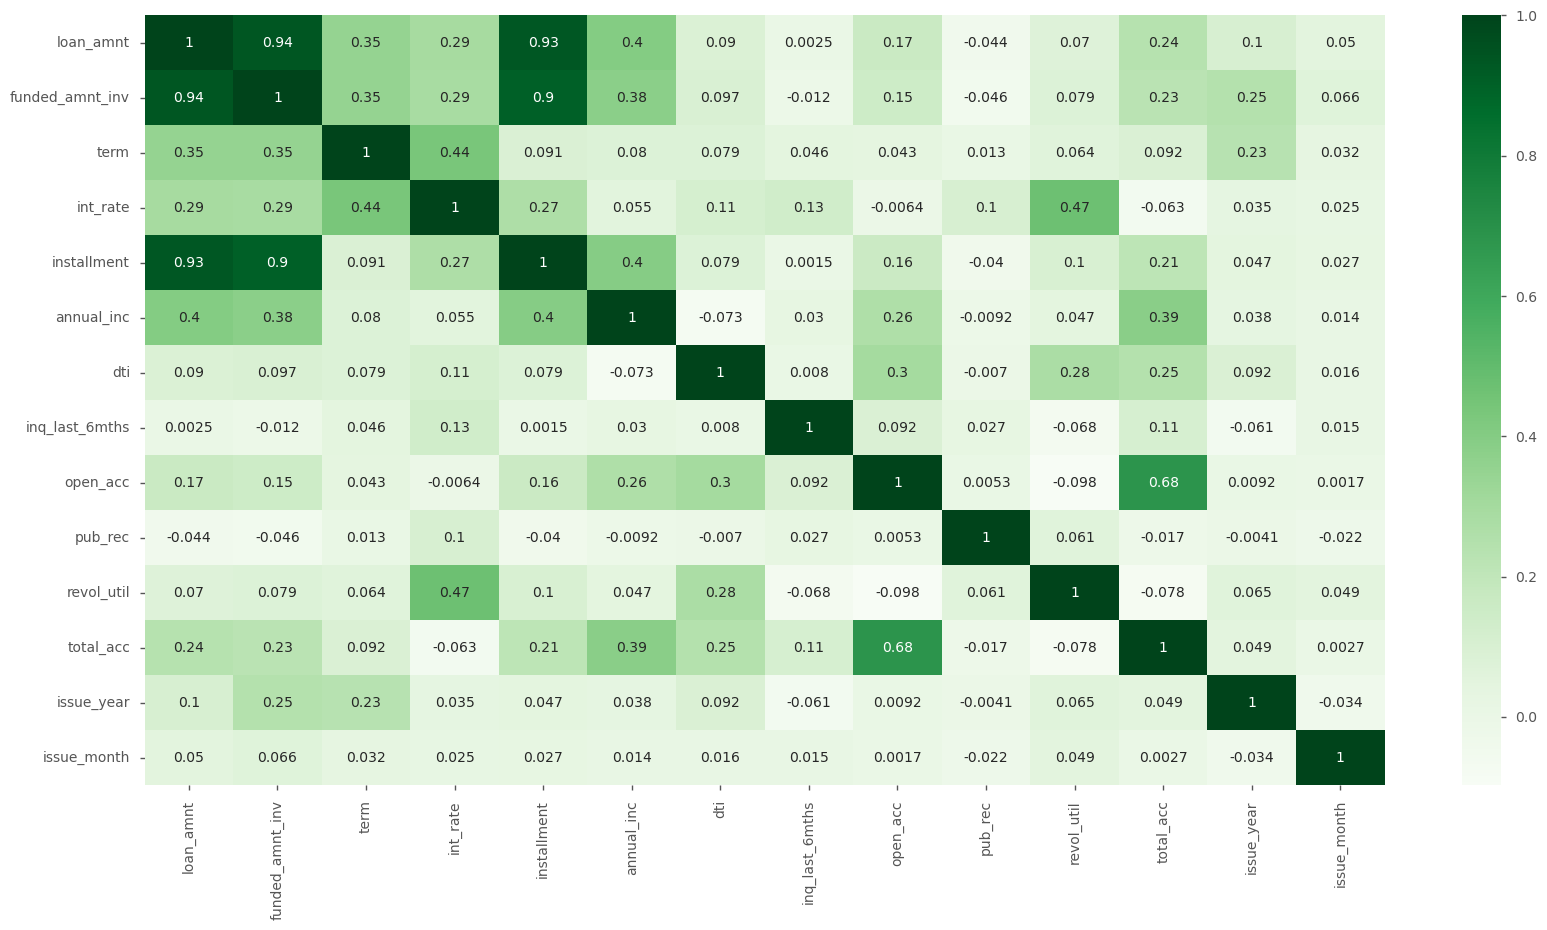

In [74]:
# print(df_var.corr())
  
# plotting correlation heatmap
plt.figure(figsize=[20,10])

dataplot = sns.heatmap(df_var.corr(),cmap = "Greens", annot=True)

plt.show()

In [75]:
pd.pivot_table(charged_off,
               index=['home_ownership', 'issue_year'],
               values=['loan_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','open_acc', 'revol_util'])

annual_inc        dti  funded_amnt_inv  \
home_ownership issue_year                                             
MORTGAGE       2007        62946.470588  16.487647      1037.410000   
               2008        70630.727273  13.463333      2741.031414   
               2009        64765.226316  12.788789      9115.938316   
               2010        66515.048696  13.886591     10811.981722   
               2011        66755.282659  14.878289     14200.740008   
OTHER          2008        45000.000000  11.955000      2015.645000   
               2009        62107.916667  12.071667      9397.829167   
               2010        41250.000000  21.500000     11975.000000   
               2011        32000.000000  17.930000     11475.000000   
OWN            2007        69100.000000   9.505000       720.127500   
               2008        57142.076923  10.800000      1790.384615   
               2009        46371.813953  14.360465      7401.744186   
               2010        47013.747967  13.115528      8645.737480   
               2011        51103.405622  14.470482     11609.305783   
RENT           2007        52142.000000  10.462000       979.803000   
               2008        50979.352941  12.787227      2479.590504   
               2009        50901.783699  13.149624      8100.452226   
               2010        47559.640000  13.283117      8811.959903   
               2011        49990.105063  14.508563     10707.400797   

                           installment   int_rate     loan_amnt   open_acc  \
home_ownership issue_year                                                    
MORTGAGE       2007         334.114118  11.761765  11370.588235   9.764706   
               2008         362.817980  11.985455  11927.272727  11.626263   
               2009         377.247000  12.873947  11185.789474   9.984211   
               2010         321.721478  13.104052  12001.000000  10.302609   
               2011         390.067357  14.218212  15013.044309  10.209320   
OTHER          2008         404.515000  10.710000  13750.000000   7.000000   
               2009         453.265833  13.666667  13312.500000   9.916667   
               2010         403.930000  11.975000  12100.000000   9.500000   
               2011         282.050000  16.490000  16000.000000  10.000000   
OWN            2007         391.375000  12.332500  11631.250000  10.000000   
               2008         354.441538  11.376154  11596.153846   8.769231   
               2009         306.393256  13.608837   9168.604651   8.953488   
               2010         259.396992  13.103496   9364.024390   8.284553   
               2011         326.618755  14.112129  12070.883534   8.746988   
RENT           2007         303.740000  11.334500   9353.750000   7.800000   
               2008         314.994874  11.743361   9979.831933   8.504202   
               2009         327.417900  13.088527   9706.818182   8.507837   
               2010         270.081517  13.526676   9593.206897   7.846897   
               2011         304.710323  14.278247  11049.398734   8.388608   

                           revol_util  
home_ownership issue_year              
MORTGAGE       2007         35.158824  
               2008         50.657576  
               2009         51.589632  
               2010         55.142052  
               2011         56.087976  
OTHER          2008         58.250000  
               2009         42.191667  
               2010         46.600000  
               2011         45.700000  
OWN            2007         47.000000  
               2008         47.107692  
               2009         47.369767  
               2010         52.752846  
               2011         53.335743  
RENT           2007         57.715000  
               2008         50.889076  
               2009         50.017868  
               2010         54.885779  
               2011         58.337475

### Below are defaulted scenarios
 - For home ownership for MORTGAGE for annual_inc in year 2008
 - For home ownership for MORTGAGE for loan_amnt in year 2011
 - For home ownership for OTHER for loan_amnt in year 2011
 - For home ownership for MORTGAGE funded_amnt_inv, installment, int_rate, loan_amnt, revol_utils increased rapidly every year. So increase in any of these columns will directly impact others and will have more changes to be defaulted


In [76]:
df_var.groupby(['purpose','loan_status', 'issue_year'])['loan_amnt'].mean().sort_values(ascending=False)

purpose         loan_status  issue_year
medical         Fully Paid   2007          18000.000000
major_purchase  Charged Off  2007          16000.000000
small_business  Charged Off  2011          15734.179688
                             2007          15662.500000
house           Charged Off  2008          15000.000000
                                               ...     
vacation        Fully Paid   2007           4366.666667
moving          Fully Paid   2007           4233.333333
vacation        Charged Off  2009           2500.000000
educational     Charged Off  2007           1950.000000
wedding         Charged Off  2007           1900.000000
Name: loan_amnt, Length: 127, dtype: float64

In [77]:
 df_var.groupby(['purpose','loan_status', 'issue_year'])['annual_inc'].mean().sort_values(ascending=False)

purpose           loan_status  issue_year
renewable_energy  Fully Paid   2009          88720.800000
major_purchase    Charged Off  2007          86400.000000
vacation          Charged Off  2009          85000.000000
home_improvement  Charged Off  2007          80666.666667
                  Fully Paid   2007          80390.909091
                                                 ...     
educational       Charged Off  2010          37603.529412
moving            Fully Paid   2007          36458.666667
car               Fully Paid   2007          29000.000000
medical           Fully Paid   2007          27000.000000
educational       Charged Off  2007          20560.000000
Name: annual_inc, Length: 127, dtype: float64

- For renewable_energy for loan status fully paid for annual_inc in year 2007
- For renewable_energy for loan status fully paid  for annual income for year 2009

In [79]:
pd.pivot_table(charged_off,
               index=['home_ownership', 'grade'],
               values=['loan_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','open_acc', 'revol_util'])

annual_inc        dti  funded_amnt_inv  installment  \
home_ownership grade                                                          
MORTGAGE       A      58603.126923  13.792077      7862.160038   245.611615   
               B      64025.895018  13.778363     10735.144199   320.478078   
               C      66402.077947  14.804525     11457.294202   342.023536   
               D      67251.230392  14.504069     12656.555196   395.993505   
               E      72346.880597  15.112239     16471.103881   480.812724   
               F      78215.519380  14.963488     19204.874341   573.172016   
               G      79259.891892  13.213784     18034.485676   557.552432   
OTHER          A      47500.000000  15.670000     10712.500000   415.880000   
               B      59985.400000  12.410000      8514.302000   403.280000   
               C      46400.000000   7.785000      3715.645000   496.335000   
               D      55413.600000  16.050000     10150.488000   340.328000   
               E      50000.000000  17.780000      9050.000000   446.580000   
               F      85000.000000   4.930000     11950.000000   902.500000   
OWN            A      45126.365385  13.015577      7425.450385   230.731923   
               B      45631.982143  13.371250      8925.340804   262.430625   
               C      45588.934579  13.832056      8235.456636   273.940841   
               D      53359.346154  14.564744     10646.277564   335.294615   
               E      60996.764706  14.659804     13223.371961   381.637843   
               F      55610.954545  13.723636     15084.010000   448.019545   
               G      68900.000000  17.224000     19496.807000   640.715000   
RENT           A      44211.121864  13.140645      6656.236237   212.292724   
               B      46786.850789  14.217575      8760.434605   277.606714   
               C      48320.915452  14.342041      8568.323163   284.661574   
               D      51428.571672  13.628669      9511.271638   303.014181   
               E      53167.262687  13.842776     12112.875403   355.856687   
               F      59201.201493  13.683507     15286.255149   436.403582   
               G      61685.521739  13.208478     14876.448478   478.285652   

                       int_rate     loan_amnt   open_acc  revol_util  
home_ownership grade                                                  
MORTGAGE       A       7.512731   8453.846154   9.965385   37.698077  
               B      11.085872  12152.090747   9.875445   46.631851  
               C      13.607947  12887.595057   9.992395   56.641635  
               D      15.841446  14344.975490  10.524510   61.448873  
               E      17.965448  18404.291045  10.570896   67.683694  
               F      19.963101  21294.573643  11.333333   69.484496  
               G      21.199730  19286.486486  13.945946   69.316216  
OTHER          A       8.755000  13100.000000   9.000000   26.350000  
               B      11.190000  12830.000000   9.000000   43.900000  
               C      11.935000  15000.000000   8.500000   41.300000  
               D      15.726000  11300.000000   9.800000   57.700000  
               E      16.000000  12800.000000  14.500000   54.150000  
               F      17.900000  25000.000000   4.000000   10.100000  
OWN            A       7.485769   7608.173077   8.019231   31.030769  
               B      11.111429   9760.714286   8.919643   43.163393  
               C      13.569907   9549.532710   8.420561   51.957944  
               D      15.906795  11850.961538   8.371795   60.266667  
               E      18.166863  14275.000000   9.470588   71.164706  
               F      20.162727  16090.909091   8.363636   74.177273  
               G      21.151000  23192.500000   9.900000   63.700000  
RENT           A       7.670681   7038.440860   8.455197   36.377921  
               B      11.156729   9630.236729   8.512195   47.454620  
               C      13.614

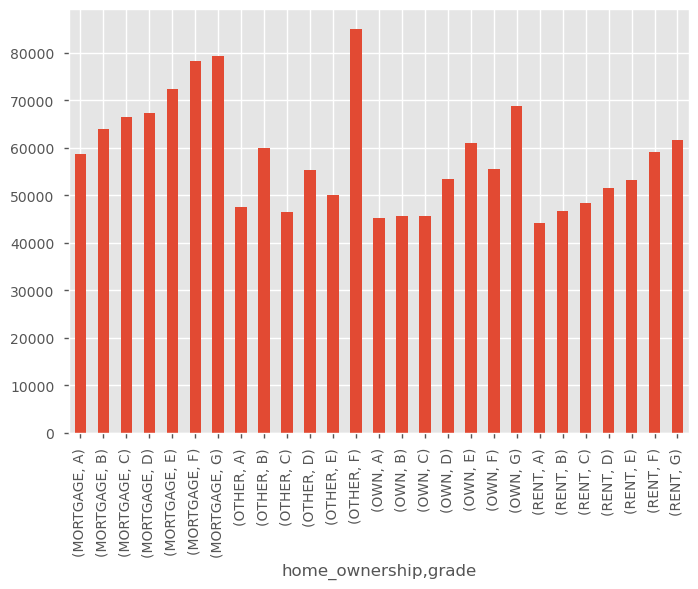

In [80]:
charged_off.groupby(['home_ownership', 'grade'])['annual_inc'].mean().plot.bar()
plt.show()

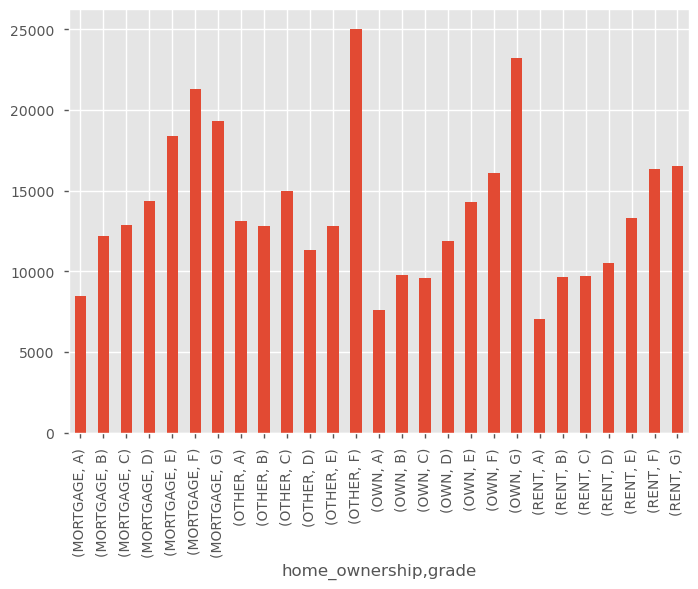

In [81]:
charged_off.groupby(['home_ownership', 'grade'])['loan_amnt'].mean().plot.bar()
plt.show()

- For MORTGAGE annual income
- For OTHER grade F annual income 
- FOR OTHER grade F loan amount

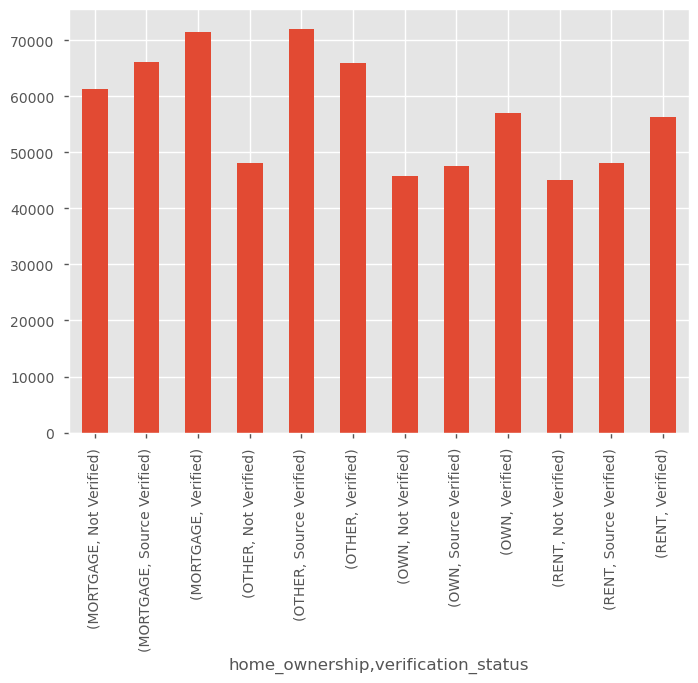

In [82]:
charged_off.groupby(['home_ownership', 'verification_status'])['annual_inc'].mean().plot.bar()
plt.show()


 With above analysis we get to know even if verification status is source verified or verified it still can be defaulted
 - For Home ownership MORTAGE for verified and for source verified for annual income
 - For home ownership OTHER for verified and source verified for annual income

 - For medical purpose for loan status fully paid for loan_amnt in year 2007
 - For Major Purchas for status charged off for loan_amnt in 2007


# Conclusion
- Since the last date for fully paid customer is Nov 2008 and defaulted can be max for 7 years, so it can concluded that fully paid customers do not default not defaulted.

####  Based on our analysis, highest chances of people defaulting are in the following categories or generally meet the following criteria:
- People with more than 10 years of experience (employee length 10+ years)
- People with 3 years of term
- People with Grade B
- People with house ownership as 'RENT' or Mortgage
- People without verification or people who are not verified
- People with 6k-8k of loan amount
